# Analysis
In this notebook that analysis is done. 

Things that are done in this section:
- Implement functions that exctract information from the .dat files
   - The header
   - The contribution summary
   - The contribution per generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from analysis import *
from simulation import *
import math

In [2]:
#testFile = "TestSimulation.dat"
testFile = "figure2_100000_4_2_100_RandomRound_1.00_1.00_1000_1_1_StepWiseLinear_0_7.00.dat"

Detail TestSimulation:

    generations = 10000
    numberOfGames = 1000
    numberOfRounds = 4
    groupSize = 2
    popSize = 100

    alphaPoor = 0.8
    alphaRich = 0.8
    wealthPoor = 1
    wealthRich = 1
    typeOfRiskCurve = RiskCurve.Linear

    heterogeneous = False

Detail TestHeteroSimulation:

    generations = 10000
    numberOfGames = 1000
    numberOfRounds = 4
    groupSize = 2
    popSize = 100

    alphaPoor = 0.8
    alphaRich = 0.5
    wealthPoor = 1
    wealthRich = 4
    typeOfRiskCurve = RiskCurve.Linear

    heterogeneous = True
    

## Reading the file

### ReadingHeader

In [3]:
header = readHeader(filename = testFile)
header

{'nr_generations': 100000.0,
 'number_of_rounds': 4.0,
 'group_size': 2.0,
 'population_size': 100.0,
 'risk_in_round': 'RandomRound',
 'alpha_poor': 1.0,
 'alpha_rich': 1.0,
 'number_of_games': 1000.0,
 'wealth_poor': 1.0,
 'wealth_rich': 1.0,
 'type_of_risk_curve': 'StepWiseLinear',
 'heterogenous': 0.0,
 'lambda_value': 7.0}

### Reading the contribution 

In [4]:
ContributionArray = readContributionFileToData(fileName = testFile, heterogeneous = header["heterogenous"], rounds = int(header["number_of_rounds"]))
ContributionArray.shape

(100000, 4)

/Users/bogdanvlad/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/bogdanvlad/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


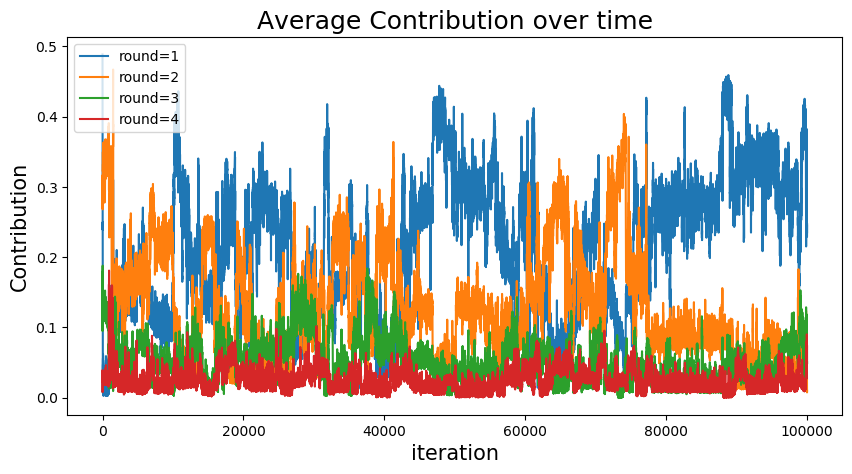

In [5]:
fig = plotContributionVsGeneration(ContributionArray)

### Reading summary

In [6]:
summary = readSummary(filename=testFile,heterogeneous=header["heterogenous"])
summary

{'AverageContribution': 0.413855,
 'AverageContributionPerRoundRich': array([0.217031, 0.125613, 0.048444, 0.022755])}

-------
Things to further do:
- Combine the information of multiple simulations in one plot
- Make plots of the paper.

figure2_100000_1_2_100_EveryRound_1.00_1.00_1000_1_1_Linear_0_1.00.dat
figure2_100000_2_2_100_EveryRound_1.00_1.00_1000_1_1_Linear_0_1.00.dat
figure2_100000_4_2_100_EveryRound_1.00_1.00_1000_1_1_Linear_0_1.00.dat
[[1, 0.6720448112749999, 0.6720448112749999, 0.6720448112749999, 0.6720448112749999], [1, 0.5777990967000001, 0.5404442449375001, 0.5404442449375001, 0.5404442449375001], [1, 0.5755138368000001, 0.4627139092125001, 0.43954911468750013, 0.43157359241250015]]
figure2_100000_1_2_100_FirstRound_1.00_1.00_1000_1_1_Linear_0_1.00.dat
figure2_100000_2_2_100_FirstRound_1.00_1.00_1000_1_1_Linear_0_1.00.dat
figure2_100000_4_2_100_FirstRound_1.00_1.00_1000_1_1_Linear_0_1.00.dat
[[1, 0.6762979440500001, 0.6762979440500001, 0.6762979440500001, 0.6762979440500001], [1, 0.6784804025375, 0.6629817199250001, 0.6629817199250001, 0.6629817199250001], [1, 0.6688264879000001, 0.6541871612500001, 0.6378886108, 0.6236839163875001]]
figure2_100000_1_2_100_LastRound_1.00_1.00_1000_1_1_Linear_0_1.00.dat

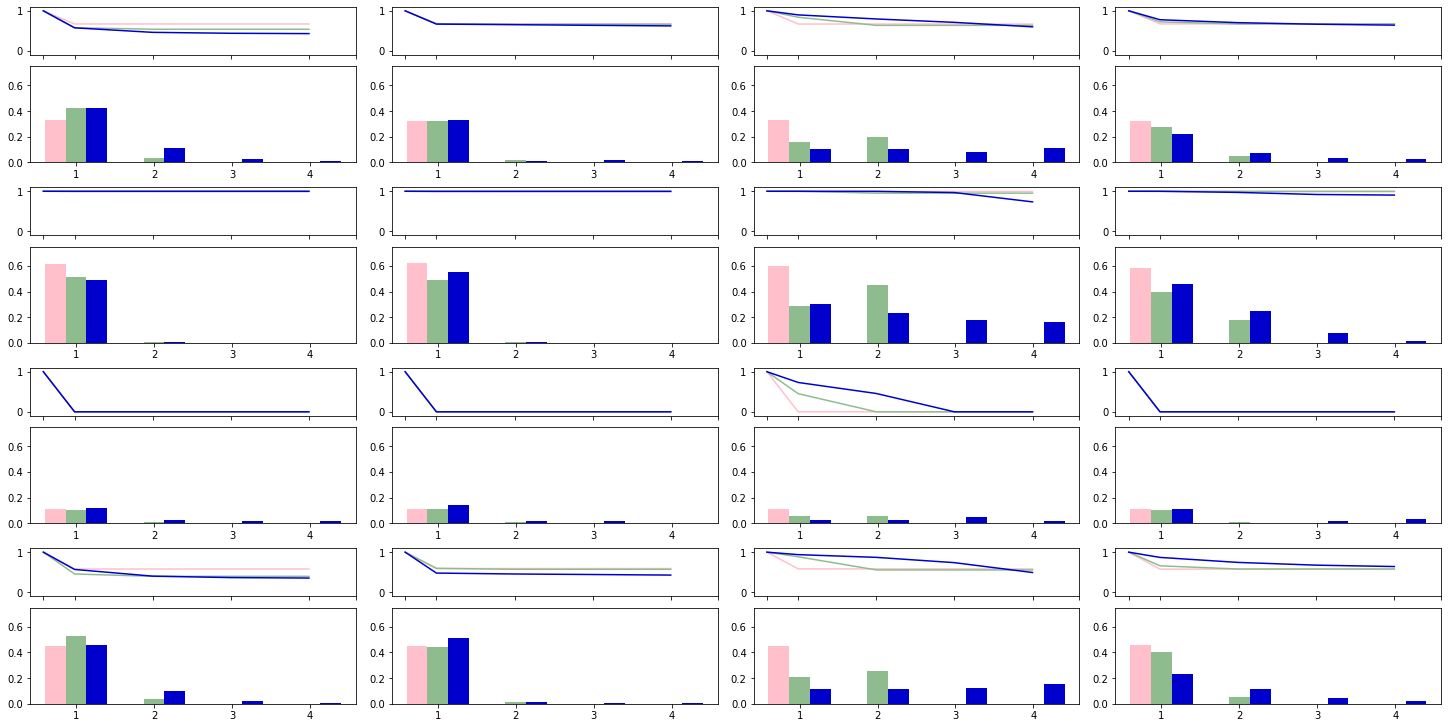

In [7]:
def linearRiskCurve(w0, collectivePot, lambdaValue):
    """ Equation (1) page 7 of the paper

    Returns:
        True, Loss is happening
        False, Loss is not happening
    """
    x = (1.0 - (collectivePot/w0)*lambdaValue)
    if x < 0:
        return 0
    else:
        return x

def powerRiskCurve(w0, collectivePot, lambdaValue):
    """ Equation (2) page 7 of the paper"""
    return (1.0 - (collectivePot/w0) ** lambdaValue)

def stepWiseRiskCurve(w0, collectivePot, lambdaValue):
    """Equation (3) page 7 of the paper"""
    return 1.0 / ( math.exp(lambdaValue*(collectivePot/w0 - 0.5)) + 1.0 )

# reference: https://stackoverflow.com/questions/48157735/plot-multiple-bars-for-categorical-data
def subcategorybar(axis, X, vals, colors, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        axis.bar(_X - width/2. + i/float(n)*width, vals[i], width=width/float(n), align="edge", color=colors[i])   
    axis.set_xticks([0, 1, 2, 3])
    axis.set_xticklabels([1, 2, 3, 4])
    axis.axis(ymin=0, ymax=0.75)
    
def plot(filename_1round, filename_2round, filename_4round, stabilityPoint):
    result_plot1 = readContributionFileToData(filename_1round, 0, 1, 100000)
    result_plot2 = readContributionFileToData(filename_2round, 0, 2, 100000)
    result_plot4 = readContributionFileToData(filename_4round, 0, 4, 100000)

    x1 = [(np.mean(result_plot1[stabilityPoint:])), 0, 0, 0]
    x2 = [np.mean(result_plot2[stabilityPoint:,0]), np.mean(result_plot2[stabilityPoint:,1]), 0, 0]
    x3 = [np.mean(result_plot4[stabilityPoint:,0]), np.mean(result_plot4[stabilityPoint:,1]), np.mean(result_plot4[stabilityPoint:,2]), np.mean(result_plot4[stabilityPoint:,3])]
    
    subcategorybar([1, 2, 3, 4], [x1, x2, x3], ["red", "blue", "green"])

    plt.ylim(top=0.75) #ymax is your value
    plt.ylim(bottom=0)
    plt.show()

rounds = [1, 2, 4]
riskInRounds = [RiskInRound.EveryRound, RiskInRound.FirstRound, RiskInRound.LastRound, RiskInRound.RandomRound]
riskCurves = [[RiskCurve.Linear, 1], [RiskCurve.PowerFunction, 10], [RiskCurve.Linear, 10], [RiskCurve.StepWiseLinear, 7]]
results = []
risks = []
stabilityPoint = 20000

for row2, riskCurve in enumerate(riskCurves):
    for row, riskInRound in enumerate(riskInRounds):
        b = []
        
        for r in rounds:
#             print(riskCurve)
            stringName = "figure2_100000_%d_2_100_%s_1.00_1.00_1000_1_1_%s_0_%.02f.dat" % (r, riskInRound.name, riskCurve[0].name, riskCurve[1])
            headerFile = readHeader(filename=stringName)
            contributionArray = readContributionFileToData(fileName = stringName, heterogeneous = headerFile["heterogenous"], rounds = int(headerFile["number_of_rounds"]))
            print(stringName)
#             print(contributionArray)
            
            if (np.shape(contributionArray)[1] == 1):
                x = [(np.mean(contributionArray[stabilityPoint:])), 0, 0, 0]
            elif (np.shape(contributionArray)[1] == 2):
                x = [np.mean(contributionArray[stabilityPoint:,0]), np.mean(contributionArray[stabilityPoint:,1]), 0, 0]
            elif (np.shape(contributionArray)[1] == 4):
                x = [np.mean(contributionArray[stabilityPoint:,0]), np.mean(contributionArray[stabilityPoint:,1]), np.mean(contributionArray[stabilityPoint:,2]), np.mean(contributionArray[stabilityPoint:,3])]

            b.append(x)
#         result.append(np.sum(b,axis=1))
        _risks = []
        for x in b:
            riskForContributions = [1]
            totalContribution = 0
    
            for y in x:
                totalContribution += y 
                if riskCurve[0] == RiskCurve.Linear:
                    riskForContributions.append(linearRiskCurve(1, totalContribution, riskCurve[1]))
                if riskCurve[0] == RiskCurve.PowerFunction:
                    riskForContributions.append(powerRiskCurve(1, totalContribution, 10))
                if riskCurve[0] == RiskCurve.StepWiseLinear:
                    riskForContributions.append(stepWiseRiskCurve(1, totalContribution, 7))
            _risks.append(riskForContributions)

        print(_risks)
        risks.append(_risks)
        results.append(b)

        
# fig, axs = plt.subplots(nrows=8, ncols=4, sharex=False, sharey=True,figsize=(15,10))

# centreLocation = np.array([1,2,3,4])
# poorLocation = centreLocation - bar_width/2 - gapInBetween/2 # Have an extra -0.01 to create a gap between the bars
# richLocation = centreLocation + bar_width/2 + gapInBetween/2

index = 0
risk_index = 0

fig = plt.figure(constrained_layout=True, figsize=(20,10))
heights = [5, 10, 5, 10, 5, 10, 5, 10]
widths = [10, 10, 10, 10]
spec = gridspec.GridSpec(ncols=4, nrows=8, figure=fig, height_ratios=heights, width_ratios=widths)

for row in range(0, 8):
    for col in range(0, 4):
        ax = fig.add_subplot(spec[row, col])
        if (row % 2 == 0):
            _colors = ["pink", "darkseagreen", "mediumblue"]
            colors_index = 0
            for risk in risks[risk_index]:
                ax.plot([0, 0.10, 0.35, 0.60, 0.85], risk, color=_colors[colors_index])
                colors_index += 1
                ax.set_xticklabels([])
                ax.set_xticks([0, 0.10, 0.35, 0.60, 0.85, 1])
                ax.axis(ymin=-0.1, ymax=1.1)
            risk_index += 1
            continue
        
        subcategorybar(ax, [1, 2, 3, 4], results[index], ["pink", "darkseagreen", "mediumblue"])
        index += 1

plt.savefig('figure2.png')